# Vorlesung Python 4 - 27.01.2021

## Themen:
 * formatted Strings
 * matplotlib-Erweiterungen
 * Python-Skripte
 * Guacamole für Studenten

## 1. formatted Strings

Bei der Einführung von Strings wurde kurz erwähnt, das es sog. `formatted strings` existieren:

In [ ]:
print(f'Hello world!')

Die Strings müssen immer mit dem `f` eingeleitet werden.

Wofür sind diese `formatted strings` notwendig?

In [62]:
age = 48
vorname = 'Oliver'
name = 'Cordes'

print(f'Mein Name ist {vorname} {name} und bin {age} Jahre alt!')

# Weitere Beispiele:

print(f'{3+5}')             # Python code innerhalb der Ausgabe!
print(f'{"String"}')        # Strings innerhalb

print(f'\"String\"')        # Quote mit Backslash
print(f'{{3+5}}')           # Doppelte-Klammern für { und }

# Probleme mit Dictionaries
d = {'vorname': 'Oliver', 'name': 'Cordes'}
key = 'vorname'
print(f'{d[key]}')

Mein Name ist Oliver Cordes und bin 48 Jahre alt!
8
String
"String"
{3+5}
Oliver


**Wichtig:**
 * alle Variablen können mit `{...}` ausgegeben werden
 * innerhalb von `{...}`  können Berechnungen gemacht werden
 * Dictionaries-Elemente können nicht addressiert werden
 * Variablen können formatiert werden

Übersicht über Formatierungsmöglichkeiten:

In [63]:
i = 1234       # Ganzzahl
f = 12345.678  # Fliesskommazahl

print(f'{i} >{i:5d}< {i:010d}')    # Ganzzahl-Formatierung
print(f'{f} {f:.2f} >{f:10.1f}<')  # Fliesskommazahl-Formatierung
print(f'{f:e}')                    # Fliesskommazahl in exp-Darstellung
print(f'{f:,.2f}')                 # , für große Zahlen! 

1234 > 1234< 0000001234
12345.678 12345.68 >   12345.7<
1.234568e+04
12,345.68


## 2. matplotlib-Erweiterungen

Wir haben in den vergangenen Vorlesungen und Übungen viele Plots gesehen, die mit Python und der matplotlib erstellt worden sind. Beispiele mit Quellcodes kann man gut auf der [matplotlib-Gallery](https://matplotlib.org/3.1.1/gallery/index.html) einsehen. 

Nun wollen wir die Plots ein wenig verbessern, sie abspeichern und auch für die Verwendung mit $\LaTeX$ optimieren.

Als erstes erzeugen wir einen schönen Plot von Daten des [COBE satellite](http://lambda.gsfc.nasa.gov/product/cobe/), der die kosmische Hintergrundstrahlung gemessen hat. Aus dem Daten kann man die Temperatur des Universums durch einen Fit bestimmen:

In [64]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from kafe2 import XYContainer, Fit, Plot


# Fit a Planck function to COBE data:

# The function to be minimised:
def planck_model(f, A0, T):
    return A0 * f**3 / (np.exp(1.439 * f / T)-1.0)


data = np.loadtxt('data/Cobe.txt')

freq = data[:,0]
spectrum = data[:,1]
# note that the error is in kJ / sr and the
# spectrum in MJ/sr!
spectrum_err = (data[:,2] / 1000.)

cobe_data = XYContainer(x_data=freq, y_data=spectrum)
cobe_data.add_error(axis='y', err_val=spectrum_err)

cobe_fit = Fit(data=cobe_data, model_function=planck_model)

results = cobe_fit.do_fit()

#cobe_fit.report()

if results['did_fit']:
    print("Temperature of the universe: %8.6f+/-%8.6f K"
        %  (results['parameter_values']['T'], results['parameter_errors']['T']) )

Temperature of the universe: 2.725431+/-0.000030 K


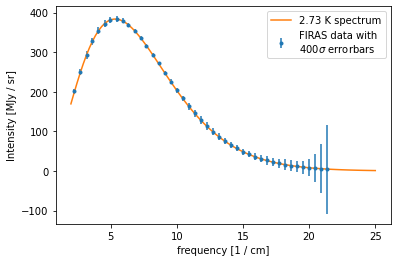

In [66]:
T = results['parameter_values']['T']
A0 = results['parameter_values']['A0']

# plot the data and the result of the fit:
f = np.linspace(2.0, 25.0, 100)
s = planck_model(f, A0, T)

fig, ax = plt.subplots()

ax.errorbar(freq, spectrum, fmt='.', yerr=spectrum_err * 400,
             label='FIRAS data with' "\n" r'$400\sigma$ errorbars')
ax.plot(f, s, label="2.73 K spectrum")

ax.set_xlabel("frequency [1 / cm]")
ax.set_ylabel("Intensity [MJy / sr]")

ax.legend()

# save the figure to a file
fig.savefig('datei.png')
#fig.savefig('datei.jpg')
#fig.savefig('datei.pdf')

Der obige Code erzeugt einen gut aussehenden Plot innerhalb eines Notebooks.

## 2.1 Abspeichern eines Plots

Die matplotlib kann mit der Funktion `plt.savefig` den aktuellen Plot in einer Datei abspeichern. Als Argument wird der Dateiname übergeben. Die Endung des Namens gibt den Typ der Graphik-Datei vor:

* datei.png -> PNG Dateien
* datei.jpg -> JPEG Dateien
* datei.pdf -> PDF Dateien

In [ ]:
#plt.savefig('datei.png')
#plt.savefig('datei.jpg')
#plt.savefig('datei.pdf')

## 2.2 Einbinden in $\LaTeX$

Wie man schnell sieht, sind beim Einbinden der Datei in ein $\LaTeX$-Dokument die Größen der Fonts und auch die Achsen-Ticks passen in ihrer Größe nicht zu der Font-Größe in dem Text-Dokument. Man kann mit dem Skalieren händisch rumprobieren, bis man optisch gute Einstellungen gefunden hat.

Thomas Erben hat ein Python-Modul erstellt `homegenise_plot` welches die Anpassungen des Plots and ein Text-Dokument automatisiert. Man muss dieses Modul nur einmal vor den Plot-Anweisungen laden und dann wie gewohnt einen Plot erstellen und abspeichern:

Eine ausführliche Dokumentation und Diskussion finden Sie unter [https://binderhub.astro.uni-bonn.de/v2/gh/terben/Python-cheat-sheets/master]

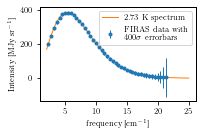

In [67]:
import homogenise_plot as hp

# create a homogenised plot for a columnwidth of 2.8 inch:
hp.homogenise_plot(fig_width=2.8)

T = results['parameter_values']['T']
A0 = results['parameter_values']['A0']

# plot the data and the result of the fit:
f = np.linspace(2.0, 25.0, 100)
s = planck_model(f, A0, T)

fig, ax = plt.subplots()

ax.errorbar(freq, spectrum, fmt='.', yerr=spectrum_err * 400,
             label='FIRAS data with' "\n" r'$400\sigma$ errorbars')
ax.plot(f, s, label="2.73 K spectrum")

ax.set_xlabel(r"frequency [\si{\per\centi\meter}]")
ax.set_ylabel(r"Intensity [\si{\mega\jansky\per\steradian}]")

ax.legend()


# save the figure to a file
fig.savefig('datei_homogenised.png')

plt.show()   # necessary to flush the image queue

# revert changes to the configuration made by homogenize_plot:
hp.revert_params()

Was passiert in dem Code?

 * das Modul `homogenise_plot` wird geladen
 * wir konfigurieren das Modul für eine zwei-spaltige Anordnung, wobei eine Spalte 2.8 inch (Zoll) breit ist
 * wissenschaftliche Artikel haben eine typische Spaltenbreite von 3.5 inch
 * physikalische Einheiten in den Labels werden mit dem $\LaTeX$-Paket `siunix` erstellt
 * am Ende werden die Original-Einstellungen wieder aktiviert
 * in Jupyter-Notebooks muss vor dem `hp.revert_params()` ein `plt.show()` aufgerufen werden!

## 3. Python-Skripte

In vielen Fällen möchte man seine Python-Programme nicht nur innerhalb von Jupyter-Notebooks laufen lassen, sondern man möchte die Codes im Rahmen von Datenanalysen nutzen, wie z.B. bei den Linux-Beispielen im Terminal.

Fangen wir hier nochmal mit einem bekannten Beispiel an:

Loading data ...
Loading finished!
Done.


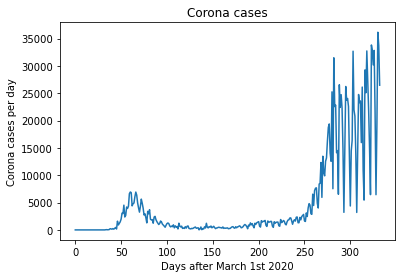

In [68]:
%matplotlib inline

# importing our own python file like a library
import corona_data

# module to make available data structures and routines
# for numerics
import numpy as np
import matplotlib.pyplot as plt

print('Loading data ...')

# first read all the data into an own Corona class structure. This
# needs to be done only once within this notebook!
corona = corona_data.CoronaData()

print('Loading finished!')

# The countries listed are accessed as a member variable of the Corona class.
# We do not need them immediately but it comes in handy for your own tasks
# below.
countries = corona.countries

# now isolate interesting data for a specific country
country = 'Germany'

# The structure 'corona[country]' contains a triple of numpy-arrays
# with days, cases and deaths. We assign them to three variables
# with 'simultaneous assignment'.
day, cases, deaths = corona[country]

# plot the data
fix, ax = plt.subplots()
ax.plot(day, cases)
ax.set_title('Corona cases')
ax.set_xlabel('Days after March 1st 2020')
ax.set_ylabel('Corona cases per day')

fig.savefig('corona_cases.png')

print('Done.')

Wie Sie sehen, wird mit dem Code aus der obigen Zelle eine Graphik erzeugt. Dieses soll nun übertragen werden in eine Python-Skript!

**Wichtig in einem Python-Skript:**

 * die Endung muss `.py` sein
 * Aufrufe sind `python3 script.py``
 * alle `%...` Zeilen führen zu Fehlern in Skripten, diese sind explizite Notebooks-Anweisungen!
 * bei der Erstellung von matplotlib-Plots, kann man interaktiv Plots erzeugen, dazu muss die
   Graphik mit `plt.show()` angezeigt werden!

## 4. Guacamole für Studenten

<img src="figs/Apache_Guacamole_logo.png" style="width: 20%" />

Nein, wir machen kein Essen für Studenten oder eine Studentenparty!

Guacamole ist ein Programm, mit den man im Web-Browser auf einen Linux-Rechner in dem Astro-CipPool zugreifen kann. Man kann so arbeiten, als wäre man vor Ort. Alle Programme, auch mit grafischen Output, sind verfügbar!

Der Weblink ist https://guacamole-students.astro.uni-bonn.de . Einloggen ist mit UniID und zugehörigem Passwort möglich. 

**Anmerkungen:**
 * am Besten funktioniert ein Firefox-Browser (Tastenprobleme bei anderen Browsern)
 * es werden Tasten von Linux genutzt, d.h. von MacOS unterschiedliche Tasten
 * wenn man das Browser-Fenster schliesst, wird man automatisch ausgeloggt, Daten können verloren gehen, ein *Wiederaufnehemen* der Verbindung ist nicht möglich
 